In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasets=pd.read_csv("C://Users//basit//Downloads/Churn_Modelling.csv")
datasets.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [3]:
datasets.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
x = datasets.iloc[:,:-1]
y = datasets.loc[:, "Exited"]

In [5]:
x.shape

(10000, 8)

In [9]:
ss= StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [79]:
x_train.shape

(8000, 8)

In [80]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
937,2.063884,0.484225,-0.004426,0.835324,-0.911583,-1.547768,0.970243,1.234723
9355,0.915392,0.102810,1.032908,-1.225848,-0.911583,0.646092,-1.030670,1.164024
2293,0.398053,0.579578,-1.733315,-0.299734,-0.911583,0.646092,-1.030670,1.699145
192,-1.774770,0.102810,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,0.259204
8675,0.656722,1.437761,0.687130,0.795384,-0.911583,0.646092,-1.030670,0.220617
...,...,...,...,...,...,...,...,...
5624,-0.346915,0.579578,-1.387538,-1.225848,-0.911583,0.646092,-1.030670,0.751341
6005,-0.150326,-1.422847,1.378686,-1.225848,0.807737,-1.547768,0.970243,-1.065242
987,-0.843560,-0.469311,-1.733315,1.207697,-0.911583,0.646092,-1.030670,0.038422
6152,-1.474714,2.391296,-1.041760,-1.225848,-0.911583,0.646092,0.970243,-1.634803


In [81]:
import tensorflow

In [82]:
from keras.layers import Dense,Dropout
from keras.regularizers import l2       #use to improve accuracy
from keras.callbacks import EarlyStopping   #use to improve accuracy
from keras.models import Sequential

In [83]:
ann = Sequential()

In [84]:
ann.add(Dense(6,input_dim=8,activation='relu'))    #kernel_regularizer=l2(l2=0.01)  #use to improve accuracy
#ann.add(Dropout(0.40))
ann.add(Dense(4,activation='relu'))
#ann.add(Dropout(0.40))
ann.add(Dense(2,activation='relu'))
#ann.add(Dropout(0.40))
ann.add(Dense(1,activation='sigmoid'))

C:\Users\basit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
ann.fit(x_train,y_train,batch_size=100,epochs=50,validation_data=(x_test,y_test))     #callbacks=EarlyStopping()  #use to improve accuracy

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7943 - loss: 0.6605 - val_accuracy: 0.7890 - val_loss: 0.6064
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.5858 - val_accuracy: 0.7890 - val_loss: 0.5540
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7987 - loss: 0.5424 - val_accuracy: 0.7890 - val_loss: 0.5242
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7966 - loss: 0.5094 - val_accuracy: 0.7890 - val_loss: 0.5020
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.4792 - val_accuracy: 0.7890 - val_loss: 0.4846
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4778 - val_accuracy: 0.7890 - val_loss: 0.4731
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8035 - loss: 0.4535 - val_accuracy: 0.7890 - val_loss: 0.4637
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4458 - val_accuracy: 0.7890 - val_loss:

In [87]:
train_accuracy = ann.history.history['accuracy']
test_accuracy = ann.history.history['val_accuracy']

In [88]:
len(train_accuracy)

50

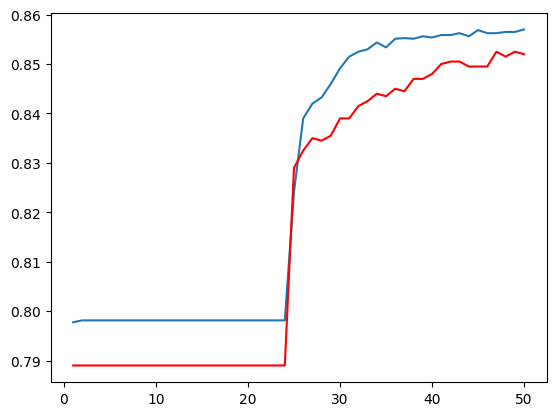

In [89]:
plt.plot([i for i in range(1,51)],train_accuracy)
plt.plot([i for i in range(1,51)],test_accuracy,c='red')
plt.show()

In [90]:
prd = ann.predict(x_test)   # this step help us to check the accuracy of model
prd_data = []

for i in prd:
    if i[0] > 0.5 :
        prd_data.append(1)
    else :
        prd_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step  


In [91]:
prd1 = ann.predict(x_train)    # this step help us to check the accuracy of model
prd_data1 = []

for i in prd1:
    if i[0] > 0.5 :
        prd_data1.append(1)
    else :
        prd_data1.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,prd_data)*100

85.2

In [94]:
accuracy_score(y_train,prd_data1)*100

85.7

In [95]:
input_data = np.array([[6252, -0.564197, -0.660018, -0.695982, 0.324119, 0, 0, 0]])    # this step help us to check the whether the model is running good or not
prd1 = ann.predict(input_data)
prd_data1 = []

for i in prd1:
    if i[0] > 0.5 :
        prd_data1.append(1)
    else :
        prd_data1.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [96]:
prd1

array([[0.]], dtype=float32)

In [97]:
y_test

937     0
9355    0
2293    1
192     0
8675    0
       ..
5624    0
6005    0
987     1
6152    0
2092    1
Name: Exited, Length: 2000, dtype: int64